# In this notebook I cover the most fundamental concepts of tensors using TensorFlow

More specifically, I am going to cover:
* Introduction to tensors
* Getting information  from tensors
* Maniputlating tensors
* Tensors & Numpy
* Using @tf.function (a way to speed up your regular Python functios)
* Using GPUs with tensorflow or (TPUS)
* Exercises to try our myself.

## Introduction to Tensors

In [2]:
# Import Tensorflow
import tensorflow as tf
import tensorflow_hub as hub
print(tf.__version__)
print(hub.__version__)

2.12.0
0.13.0


In [3]:
# Creating tensors with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [4]:
# check the number of dimension of a tensor (ndim stands for number of dimension)
scalar.ndim

0

In [5]:
# Create a vector
vector = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [6]:
# Check the dimension of vector
vector.ndim

1

In [7]:
# Create a matrix (has more than 1 dimension)
matrix = tf.constant([[10,7],
                      [7,10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [8]:
matrix.ndim

2

In [9]:
# Create another matrix
another_matrix = tf.constant([[10., 7.],
                             [3., 3.],
                            [8.,9.]], dtype=tf.float16) # specify the data type with dtype parameters
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  3.],
       [ 8.,  9.]], dtype=float16)>

In [10]:
# Nummber of dimensions of another_matrix
another_matrix.ndim

2

` You realize that the number of dimensions is how many elements is in a shape`

In [11]:
# Create  a tensor
tensor = tf.constant([[[1,2,3,4],
                       [4,5,6,7]],
                       [[7,8,9,9],
                        [10,11,12,11]],
                     [[13,14,15,34],
                      [16,17,18,56]]])
tensor

<tf.Tensor: shape=(3, 2, 4), dtype=int32, numpy=
array([[[ 1,  2,  3,  4],
        [ 4,  5,  6,  7]],

       [[ 7,  8,  9,  9],
        [10, 11, 12, 11]],

       [[13, 14, 15, 34],
        [16, 17, 18, 56]]], dtype=int32)>

In [12]:
tensor.ndim

3

 What I've created so far:

 * Scalar: a single number
 * Vector: a number with direction (e.g wind spead and direction)
 * Matrix: a 2-dimensional array of numbers
 * Tensor: an n-dimensional array of number of more where n can be any number

#### Creating tensors with tf.Variable

In [13]:
# Create the same tensor with tf.Variable as above
changeable_tensor = tf.Variable([10,7])
unchangeable_tensor = tf.constant([10,7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [14]:
# Trying to change one of the elements in our changeable tensor
changeable_tensor[0] = 7
changeable_tensor

TypeError: ignored

In [15]:
# From the documentation, try .assing()
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [16]:
# Trying to change the unchangeable tensor
unchangeable_tensor[0].assign[7]
unchangeable_tensor

AttributeError: ignored

`It doesn't work. The tf.constant ensures that no changes and affected since the tensor is a constant`

**Note:** Rarely in practice will I ever need to decide wheter to use tf.constant or tf.Variable to crate tensors, as TensorFlow does this for me.
However, if in doubt, I'll use tf.constant and change it later if needed

## Creating random tensors

Random tensors are tensors of some arbitrary size which contain random numbers

In [17]:
# Create two random (but the same) tensors
random_1 = tf.random.Generator.from_seed(42) # set seed for reproducibility
random_1 = random_1.normal(shape=(3,2))
random_2 = tf.random.Generator.from_seed(42) # set seed for reproducibility
random_2 = random_2.normal(shape=(3,2))
# Are they equal ?
random_1, random_2, random_1 == random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193765, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193765, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

## Shuffle the order of the elements

**Why would I you want to shuffle the order of the elements in a tensor?**
Assume you're working on a food classification problem and you had 15000 images of Humburger and pizza. ( first 10,000 images of Humburger and 5000 images of pizza  in that order).

*The Problem at hand is that this order could affect how our neural network learns.*

If it goes through the images in order, it might start to adjust its random weights too much so to the images of Humburger. I.e It goes through 10,000 images of humburger and identifies a pattern to the images and assumes that all images following that order are humburgers until it reaches the last 5000 images of pizza.

So it's a good idea to mix up all the images so that there is no order at all. Then the algorithm can be fed both images to learn from simultaneously

In [18]:
# Shuffle a tensor (valuable for when you want to shuffle your data so the inherent order does not affect learning)
not_shuffled = tf.constant([[10,7],
                            [6,7],
                            [2,5]])
# Shuffle our non-shuffled tensor
# Set seed for reproducability but its not working. Try another option
tf.random.shuffle(not_shuffled, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [ 6,  7],
       [10,  7]], dtype=int32)>

In [19]:
# shuffle solution trial 1
tf.random.set_seed(42)
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 6,  7],
       [ 2,  5],
       [10,  7]], dtype=int32)>

It looks like if we want our shuffled tensors to be in the same order, we've got to use the global level random seed as well as the operation level random seed:
> If both the global and the operation seed are set: Both seeds are used in conjuction to delete

 ### Other ways ot make tensors


In [20]:
# Create  tensor of ones
tf.ones([7,10], dtype=tf.float16)

<tf.Tensor: shape=(7, 10), dtype=float16, numpy=
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float16)>

In [21]:
# Create a tensor of all zeros
tf.zeros([10,7], dtype=tf.float16)

<tf.Tensor: shape=(10, 7), dtype=float16, numpy=
array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float16)>

### Turn Numpy arrays  into tensors

The main difference betweenn Numpy and TensorFlow tensors is that tensors can be run on a GPU computing.

In [22]:
# You can also turn Numpy arrays into tensors
import numpy as np
numpy_A = np.arange(1, 25, dtype=np.int32)
numpy_A
# create a Numpy array between 1 and 25

# X = tf.constant(some_matrix) # capital for matrix or tensor
# Y = tf.constant(vector) # non-capital for vector

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [23]:
A =tf.constant(numpy_A, shape=(2,4,3))
A

<tf.Tensor: shape=(2, 4, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18],
        [19, 20, 21],
        [22, 23, 24]]], dtype=int32)>

In [24]:
A.ndim

3

# Getting  Information from tensors

When dealing with tensors, its good to be aware of the following attributes:

* Shape
* Rank
* Axis or dimension
* Size

In [25]:
# Creating a rank 4 tensorj (4 dimension)
rank_4 = tf.zeros(shape=[5,3,3,5])
rank_4

<tf.Tensor: shape=(5, 3, 3, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0

In [26]:

rank_4.ndim

4

In [27]:
rank_4.shape, tf.size(rank_4)

(TensorShape([5, 3, 3, 5]), <tf.Tensor: shape=(), dtype=int32, numpy=225>)

In [28]:
#  Getting various attributes of our tensor
print("Datatype of every element:", rank_4.dtype)
print("Number of Dimensions (rank):", rank_4.ndim)
print("Shape of tensor:", rank_4.shape)
print("Elements along the 0 axis:", rank_4.shape[0])
print("Elements along the last axis:", rank_4.shape[-1])
print("Total number of elements in our tensor:", tf.size(rank_4).numpy())

Datatype of every element: <dtype: 'float32'>
Number of Dimensions (rank): 4
Shape of tensor: (5, 3, 3, 5)
Elements along the 0 axis: 5
Elements along the last axis: 5
Total number of elements in our tensor: 225


 ## Indexing tensors

 Tensors can be indexed just like Python lists

In [29]:
# Get the first 2 elements of each dimension
rank_4[:2, :2, :2, :2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [30]:
# Get the first element from each dimension from each index except for the final one
rank_4[:1,:1,:1,:]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [31]:
# Get the first element from each dimension from each index except for the second last
rank_4[:1,:1,:,:1]

<tf.Tensor: shape=(1, 1, 3, 1), dtype=float32, numpy=
array([[[[0.],
         [0.],
         [0.]]]], dtype=float32)>

In [32]:
# Create a rank 2 tensor
rank_2 = tf.constant([[20,8],
                  [3,4]])
rank_2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20,  8],
       [ 3,  4]], dtype=int32)>

In [33]:
rank_2.ndim

2

In [34]:
# Get the last item of each of row our rank_2 tensor
rank_2[:, :-1]

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[20],
       [ 3]], dtype=int32)>

In [35]:
# Add in extra dimension to our rank 2 tensor
rank_3_tensor = rank_2[..., tf.newaxis]
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[20],
        [ 8]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [36]:
# Alternative to tf.newaxis
tf.expand_dims(rank_2, axis=-1) # -1 means expand the final axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[20],
        [ 8]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [37]:
tf.expand_dims(rank_2, axis=0) # expand the 0 axis

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[20,  8],
        [ 3,  4]]], dtype=int32)>

In [38]:
rank_2

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20,  8],
       [ 3,  4]], dtype=int32)>

# Manipulating tensors

**Basic operations**

+, - , *, /

In [39]:
# I can add values to a tensor using the addition operator
tensor = tf.constant([[10,7], [3,4]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [40]:
# But the original tensor remains unchanged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [41]:
# The only way to change it is to reassing
tensor = tensor +10
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [42]:
# Mutliplication of tensors
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[200, 170],
       [130, 140]], dtype=int32)>

`All operations work on tensors the same way mathematical operation work on matrices`

## Matrix Multiplication

In machine learning, matrix multiplication is one of the most common tensor operations

There are two rules our tensors(or matrices) need to fulfill if we're going to multiply them:

1. The inner dimensions must match
2. The resulting matrix has the shape of the inner dimensions

In [43]:
print(tensor)

tf.Tensor(
[[20 17]
 [13 14]], shape=(2, 2), dtype=int32)


In [44]:
tf.linalg.matmul(tensor, tensor)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[621, 578],
       [442, 417]], dtype=int32)>

In [45]:
A = tf.constant([[1,2,5],
             [7,2,1],
             [3,3,3]])
B = tf.constant([[3,5],
                 [6,7],
                [1,8]])
tf.linalg.matmul(A,B)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[20, 59],
       [34, 57],
       [30, 60]], dtype=int32)>

In [46]:
# Matrix multiplication with python operator "@"
C = A @ B
C

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[20, 59],
       [34, 57],
       [30, 60]], dtype=int32)>

In [47]:
T = tf.reshape(B, shape=(2,3))
T

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[3, 5, 6],
       [7, 1, 8]], dtype=int32)>

If  the matrices do not meet the standard rule for multiplication, we can use **tf.reshape(tensor, shape=(x,y))**

In [48]:
B

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[3, 5],
       [6, 7],
       [1, 8]], dtype=int32)>

In [49]:
B @ tf.reshape(B, shape=(2,3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[44, 20, 58],
       [67, 37, 92],
       [59, 13, 70]], dtype=int32)>

In [50]:
# Using transpose
tf.transpose(B), tf.reshape(B, shape=(2,3))

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[3, 6, 1],
        [5, 7, 8]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[3, 5, 6],
        [7, 1, 8]], dtype=int32)>)

In [51]:
tf.transpose(B) @ B

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 46,  65],
       [ 65, 138]], dtype=int32)>

As we can see, the difference betweeen transpose and reshape is that **transpose** flips the axis and **reshape** shuffles it

## Difference between reshape and transpose operators

Modifying the shape of tensors is a very common operation in Deep Learning. For instance, when using pretrained neural networks it is often necessary to adjust the input data dimensions to correspond to what the network has been trained on, e.g. tensors of shape [batch_size, channels, width, height]

Both allow you to change the shape, however they are not the same and are commonly mistaken.

In [52]:
pip install mxnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 19.4 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as image
import mxnet as mx
from mxnet import gluon
import numpy as np

In [54]:
img_array = image.imread('/content/cat.png')
plt.imshow(img_array)
plt.axis("off")
print (img_array.shape)

FileNotFoundError: ignored

The color image has the following properties:

width: 210 pixels

height: 157 pixels

colors: 3 (RGB)

Now let’s reshape the image in order to exchange width and height dimensions.

In [ ]:
reshaped = img_array.reshape((210,157,3))
print (reshaped.shape)
plt.imshow(reshaped)
plt.axis("off")

As we can see the first and second dimensions have changed. However the image can’t be identified as cat any longer. In order to understand what happened, let’s have a look at the image below.
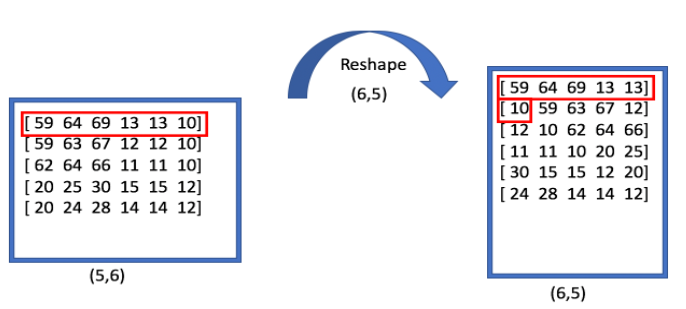
While the number of rows and columns changed, the layout of the underlying data did not. The pixel values that have been in one row are still in one row. This means for instance that pixel 10 in the upper right corner ends up in the middle of the image instead of the lower left corner. Consequently contextual information gets lost, because the relative position of pixel values is not the same anymore. As one can imagine a neural network would not be able to classify such an image as cat.

**Transpose** instead changes the layout of the underlying data.



In [ ]:
transposed = img_array.transpose((1,0,2))
plt.imshow(transposed)
plt.axis("off")

As we can see width and height changed, by rotating pixel values by 90 degrees. Transpose does the following:

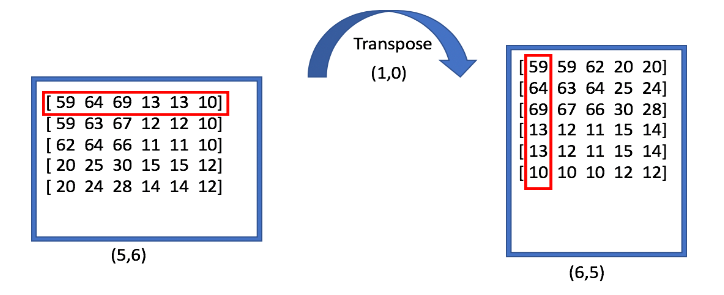

As shown in the diagram, the axes have been flipped: pixel values that were in the first row are now in the first column.



**The Dot Product**

Matrix multiplication is also referred to as the dot product.

So far I've learnt that I can perform matrix multiplication using:
* `tf.matmul()`
* `tf.tensordot()`

In [55]:
A, B

(<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
 array([[1, 2, 5],
        [7, 2, 1],
        [3, 3, 3]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[3, 5],
        [6, 7],
        [1, 8]], dtype=int32)>)

In [56]:
# Perform the dot product on A and B (requires A and B to be transposed)
tf.tensordot(A,B, axes=0)

<tf.Tensor: shape=(3, 3, 3, 2), dtype=int32, numpy=
array([[[[ 3,  5],
         [ 6,  7],
         [ 1,  8]],

        [[ 6, 10],
         [12, 14],
         [ 2, 16]],

        [[15, 25],
         [30, 35],
         [ 5, 40]]],


       [[[21, 35],
         [42, 49],
         [ 7, 56]],

        [[ 6, 10],
         [12, 14],
         [ 2, 16]],

        [[ 3,  5],
         [ 6,  7],
         [ 1,  8]]],


       [[[ 9, 15],
         [18, 21],
         [ 3, 24]],

        [[ 9, 15],
         [18, 21],
         [ 3, 24]],

        [[ 9, 15],
         [18, 21],
         [ 3, 24]]]], dtype=int32)>

In [57]:
X = tf.constant([[1, 2],
                 [3, 4],
                 [5, 6]])
Y = tf.constant([[7, 8],
                 [9, 10],
                 [11, 12]])

In [58]:
tf.tensordot(tf.transpose(X), Y, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [59]:
# Perform matrix multiplication between X and Y(transposed)
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [60]:
# Perform matrix multiplication between X and Y(reshaped)
tf.matmul(X, tf.reshape(Y, shape=(2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [61]:
# Check the values of Y and transposed Y
print("Normal Y:")
print(Y, "/n")

print("Y reshaped to (2,3)")
print(tf.reshape(Y, shape=(2,3)), 'n')

print("Y transposed: ")
print(tf.transpose(Y))


Normal Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) /n
Y reshaped to (2,3)
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) n
Y transposed: 
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


In [62]:
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

Generally when performing matrix multiplication on two tensors and one of the axes does'nt line up you wil transpose rather than reshape to satisfy the mutliplication rules

# Changing the data type of a tensor

In [63]:
# Create a new tensor with defaul datatype (float32)
D = tf.constant([[1.7, 7.4]])
D.dtype

tf.float32

In [64]:
E = tf.constant([10, 8])
E.dtype

tf.int32

In [65]:
# Changing from float32 to float16
F = tf.cast(D, dtype=tf.float16)
F, F.dtype


(<tf.Tensor: shape=(1, 2), dtype=float16, numpy=array([[1.7, 7.4]], dtype=float16)>,
 tf.float16)

In [66]:
# Changing from int32 to float32
G = tf.cast(E, dtype=tf.float16)
G, G.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([10.,  8.], dtype=float16)>,
 tf.float16)

# Aggregating tensors

Aggregating tensors is a crucial operation that involves reducing multiple values into a single value by applying functions such as sum, mean, or maximum. TensorFlow provides convenient methods to perform tensor aggregation, allowing us to obtain useful summary statistics or consolidate information from multiple elements.

By applying aggregation functions to tensors, we can extract valuable insights and make informed decisions about the data.

In [67]:
# Get the absolute values
D = tf.constant([-7, -10])
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

Let's go through the following forms of aggregation:

* Get the minimum
* Get the maximum
* Get the mean of a tensor
* Get the sum of a tensor

In [68]:
# Find the minimum
tf.reduce_min(X)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [69]:
# Find the maximum
tf.reduce_max(tf.matmul(X, tf.transpose(Y)))

<tf.Tensor: shape=(), dtype=int32, numpy=127>

In [70]:
# Find the variance
tf.reduce_var(Y)

AttributeError: ignored

**Solutions to the problem**

The above method does'nt work, there are 2 ways to go about it.

1. Using the tensorflow_probablity
2. Converting the data type into real of complex

In [ ]:
# Option 1 : Using tensorflow probability
import tensorflow_probability as tfp
tfp.stats.variance(Y)

In [ ]:
# Option 2: Converting the datatype into real or complex using tf.cast
tf.math.reduce_std(tf.cast(Y, dtype=tf.float32))

**Find the positional maximam and minimum of a tensor**



In [71]:
# Create a  new tensor for finding positional max and min
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [72]:
# Find the positionsl argmax
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [73]:
F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [74]:
# Find the positional argmin
tf.argmin(F), F[tf.argmin(F)]

(<tf.Tensor: shape=(), dtype=int64, numpy=16>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>)

In [75]:
F[tf.argmax(F)] == tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

# Squeezing a tensor (removing all single dimensions)

In [76]:
# Creating a tensor to get started
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape=[50]), shape=(1,1,1,1, 50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [77]:
G.shape

TensorShape([1, 1, 1, 1, 50])

In [78]:
G_squeezed = tf.squeeze(G)
G_squeezed, G_squeezed.shape

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
        0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
        0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
        0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
        0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
        0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
        0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
        0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
        0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
        0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
       dtype=float32)>,
 TensorShape([50]))

# One Hot encoding tensors

I already know about one-hot encoding from my machine learning experience. To understand it better I use the following resource

https://iq.opengenus.org/one-hot-encoding-in-tensorflow/

In [79]:
# Creating a list of indices
some_list = [0, 1,2,3] # could be red, green, blue, purple

# One hot encode our list of indices
tf.one_hot(some_list, depth=4)


<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [80]:
# Specifying custom values for one hot ecoding
tf.one_hot(some_list, depth=4, on_value="Yoh, I love deep learning", off_value="I also like to dance")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'Yoh, I love deep learning', b'I also like to dance',
        b'I also like to dance', b'I also like to dance'],
       [b'I also like to dance', b'Yoh, I love deep learning',
        b'I also like to dance', b'I also like to dance'],
       [b'I also like to dance', b'I also like to dance',
        b'Yoh, I love deep learning', b'I also like to dance'],
       [b'I also like to dance', b'I also like to dance',
        b'I also like to dance', b'Yoh, I love deep learning']],
      dtype=object)>

## Squaring, log, square root

In [81]:
# Creating a new tensor
H = tf.range(1,20)
H

<tf.Tensor: shape=(19,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int32)>

In [82]:
# Square it
tf.square(H)

<tf.Tensor: shape=(19,), dtype=int32, numpy=
array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121, 144, 169,
       196, 225, 256, 289, 324, 361], dtype=int32)>

In [83]:
# Find the square root(will error, method requires non-int type)
tf.sqrt(H)

InvalidArgumentError: ignored

In [84]:
# Find the squareroot
tf.sqrt(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(19,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.2360678, 2.4494896,
       2.6457512, 2.828427 , 3.       , 3.1622777, 3.3166246, 3.4641016,
       3.6055512, 3.7416573, 3.8729832, 4.       , 4.1231055, 4.2426405,
       4.3588986], dtype=float32)>

In [85]:
# Find the log
tf.math.log(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(19,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246, 2.3025851, 2.3978953, 2.4849067,
       2.5649493, 2.6390574, 2.7080503, 2.7725887, 2.8332133, 2.8903718,
       2.944439 ], dtype=float32)>

# Tensors and Numpy

The key difference between tensors and NumPy arrays is that tensors have accelerator support like GPU and TPU and are immutable.

While TensorFlow operations automatically convert NumPy arrays to Tensors and vice versa, you can explicitly convert the tensor object into the NumPy array like this:

In [86]:
# Creating a tensor directly from a Numpy array
J = tf.constant(np.array([3.,7.,20]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 20.])>

In [87]:
# Converting our tensor back to a Numpy array
np.array(J), type(np.array(J))

(array([ 3.,  7., 20.]), numpy.ndarray)

In [88]:
# Converting tensor J to a Numpy array
J.numpy(), type(J.numpy())

(array([ 3.,  7., 20.]), numpy.ndarray)

# Finding access to GPUs

In [89]:
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

**Rerun the colab notebook after changing the runtime to GPU**

In [90]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [91]:
!nvidia-smi

Thu Jul 13 11:11:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    27W /  70W |    389MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------